In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

### 1. Calculate mortage value

In [2]:
home_value = 800000
down_payment_percent = 0.2
down_payment = 800000 * down_payment_percent
print("Initial Down Payment: " + str(down_payment))
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


### 2. Calculating the Monthly Mortgage Payment

monthly mortgage payment, function .pmt(rate, nper, pv) where:

* rate = The periodic (monthly) interest rate
* nper = The number of payment periods (months) in the lifespan of the mortgage loan
* pv = The total value of the mortgage loan

30-year mortgage loan quote for your desired amount at 3.75%

In [3]:
mortgage_rate = 0.0375
mortgage_rate_periodic = ((1 + mortgage_rate) ** (1/12)) - 1
mortgage_payment_periods = 12 * 30

periodic_mortgage_payment = -1 * npf.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


### 3. The amount of the first loan payment that will go towards interest

In [4]:
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

Initial Interest Payment: 1966.43


### 4. The amount of the first loan payment that will go towards principal

In [5]:
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Principal Payment: 974.7


### 5. Simulating Periodic Payments

In [6]:
def print_payments(i, interest_payment, principal_payment, principal_remaining):
    if i < 5:
        print('Period ', i, ': Interest Paid:', interest_payment, 
              ': Principal Paid:', principal_payment, '| Remaining Balance:', round(principal_remaining[i], 2))

Period  0 : Interest Paid: 1966.43 : Principal Paid: 974.7 | Remaining Balance: 639025.3
Period  1 : Interest Paid: 1963.43 : Principal Paid: 977.7 | Remaining Balance: 638047.6
Period  2 : Interest Paid: 1960.43 : Principal Paid: 980.7 | Remaining Balance: 637066.9
Period  3 : Interest Paid: 1957.41 : Principal Paid: 983.72 | Remaining Balance: 636083.18
Period  4 : Interest Paid: 1954.39 : Principal Paid: 986.74 | Remaining Balance: 635096.44


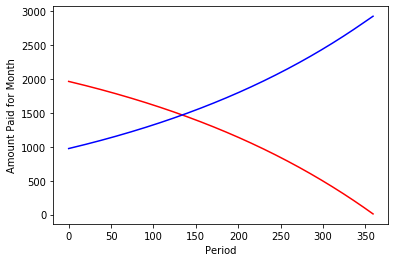

In [7]:
principal_remaining = np.zeros(360)
interest_paid = np.zeros(360)
principal_paid = np.zeros(360)

for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i - 1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining * mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    # Print the payments for the first few periods
    print_payments(i, interest_payment, principal_payment, principal_remaining)
    
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.xlabel('Period')
plt.ylabel('Amount Paid for Month')
plt.show()